# Proyecto 2

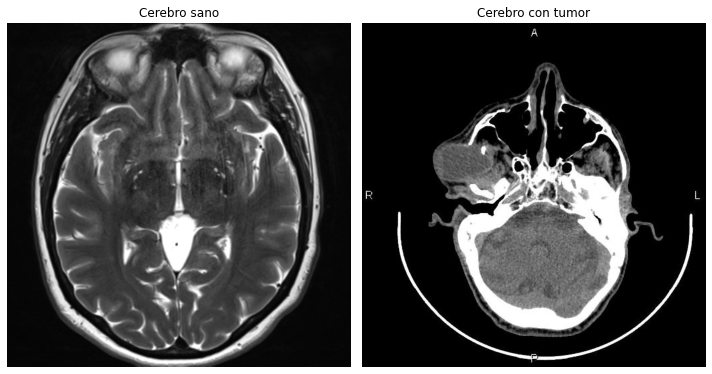

In [177]:
# Primero importamos los módulos necesarios

import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib.gridspec import GridSpec
from skimage import data, transform, exposure
from skimage.util import compare_images

# Seguidamente importamos las imágenes

cerebro = sk.io.imread("imagenes/CEREBROMRI.jpeg", as_gray= True) # Con la funcion io.imread, leemos la imágen que vamos a utilizar
tumor = sk.io.imread("imagenes/TUMORCT.jpeg", as_gray= True)

# Vamos a crear una funcion para representar las imágenes más facilmente
def show(img): 
    sk.io.imshow(img, cmap = 'gray')
    sk.io.show()

# Ahora vamos a ver las imágenes que hemos importado
fig = plt.figure(figsize=(10, 9))

gs = GridSpec(1, 2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

ax0.imshow(cerebro, cmap='gray')
ax0.set_title('Cerebro sano')
ax1.imshow(tumor, cmap='gray')
ax1.set_title('Cerebro con tumor')
plt.tight_layout()
plt.plot()
plt.show()

## Preprocesado

Histograma de la imagen del cerebro sano


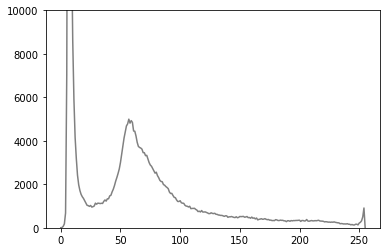

Histograma de la imagen del cerebro con tumor


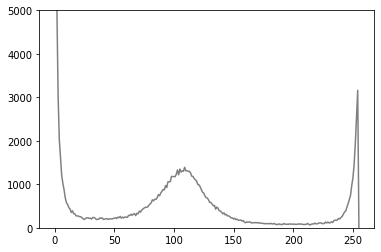

In [79]:
histograma_cerebro = cv.calcHist([cerebro], [0], None, [256], [0, 255]) # Calculamos el histograma de la imagen del cerebro
histograma_tumor = cv.calcHist([tumor], [0], None, [256], [0, 255]) # Calculamos el histograma de la imagen del tumor

# Representamos los histogramas

print("Histograma de la imagen del cerebro sano")
plt.plot(histograma_cerebro, color = "gray")
plt.ylim(0,10000)
plt.show()

print("Histograma de la imagen del cerebro con tumor")
plt.plot(histograma_tumor, color = "gray")
plt.ylim(0,5000)
plt.show()



## Umbralizacion

### Método Otsu

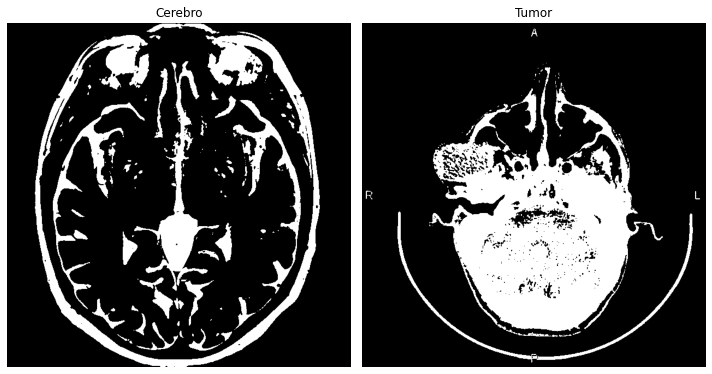

In [178]:
# Vamos a calcular el umbral de Otsu para cada imagen, para ello vamos a usar la función threshold_otsu del módulo filters de skimage

otsu_cerebro = sk.filters.threshold_otsu(cerebro, nbins=256) # Calculamos el umbral de Otsu para la imagen del cerebro sano
otsu_tumor = sk.filters.threshold_otsu(tumor, nbins=256) # Calculamos el umbral de Otsu para la imagen del cerebro con tumor

# Binarizamos la imagen de cerebro sano con el umbral de Otsu
cerebro_binarizado = cv.threshold(cerebro, otsu_cerebro, 255, cv.THRESH_BINARY)[1]

# Binarizamos la imagen de cerebro con tumor con el umbral de Otsu
tumor_binarizado = cv.threshold(tumor, otsu_tumor, 255, cv.THRESH_BINARY)[1]

fig = plt.figure(figsize=(10, 9))

gs = GridSpec(1, 2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

ax0.imshow(cerebro_binarizado, cmap='gray')
ax0.set_title('Cerebro')
ax1.imshow(tumor_binarizado, cmap='gray')
ax1.set_title('Tumor')
for a in (ax0, ax1):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()

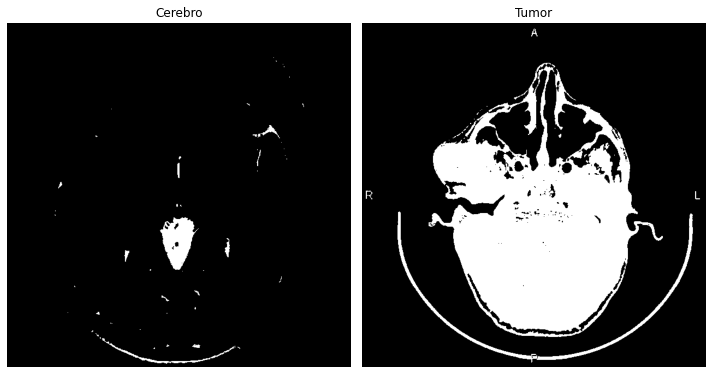

In [179]:
# Como el resultado no es muy bueno, vamos a ajustar los umbrales a mano

cerebro_binarizado_manual = cv.threshold(cerebro, 250, 255, cv.THRESH_BINARY)[1] 

tumor_binarizado_manual = cv.threshold(tumor, 60, 255, cv.THRESH_BINARY)[1]

fig = plt.figure(figsize=(10, 9))

gs = GridSpec(1, 2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

ax0.imshow(cerebro_binarizado_manual, cmap='gray')
ax0.set_title('Cerebro binarizado a mano')
ax1.imshow(tumor_binarizado_manual, cmap='gray')
ax1.set_title('Tumor binarizado a mano')
for a in (ax0, ax1):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()

### Segmentación por regiones

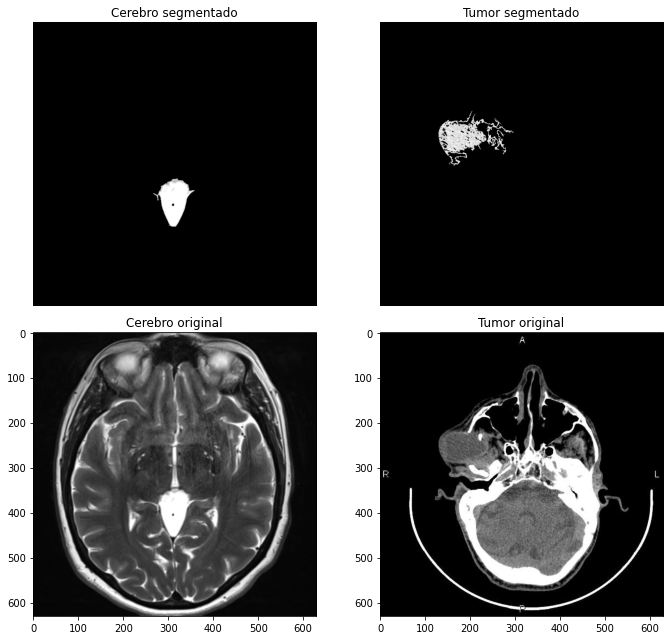

In [221]:
# Vamos a segmentar las imagenes utilizando el método de crecimiento de regiones simple
# Para ello, vamos a utilizar la función flood_fill del módulo segmentation de skimage, 
# le pasamos como parámetros la imagen, el punto de inicio y el valor que queremos que tenga la región

                                                            #(y,x)
seg_cerebro= sk.segmentation.flood_fill(cerebro, seed_point=(400,300), new_value =0, tolerance=100)

resta_cerebro = cerebro - seg_cerebro

# Segmentamos la imagen del cerebro con tumor

seg_tumor = sk.segmentation.flood_fill(tumor, seed_point=(250,200), new_value =255, tolerance=20)

resta_tumor = seg_tumor - tumor

fig = plt.figure(figsize=(10, 9))

gs = GridSpec(2, 2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax0.imshow(resta_cerebro, cmap='gray')
ax0.set_title('Cerebro segmentado')
ax1.imshow(resta_tumor, cmap='gray')
ax1.set_title('Tumor segmentado')
ax2.imshow(cerebro, cmap='gray')
ax2.set_title('Cerebro original')
ax3.imshow(tumor, cmap='gray')
ax3.set_title('Tumor original')
for a in (ax0, ax1, ax2, ax3):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()

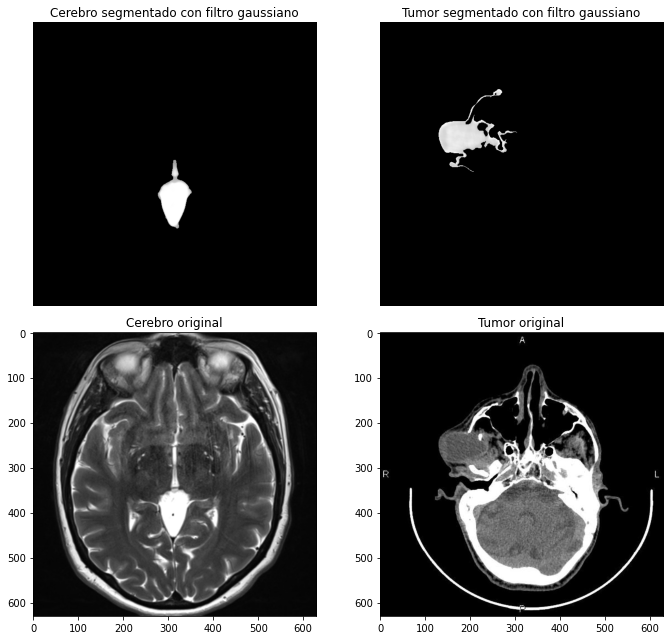

In [222]:
# Probamos a segmentar la imagen del cerebro suavizada con un filtro gaussiano

cerebro_g = cv.medianBlur(cerebro, 11)
seg_cerebro_g = sk.segmentation.flood_fill(cerebro_g, seed_point=(400,300), new_value =0, tolerance=100)

resta_cerebro = cerebro_g - seg_cerebro_g

# Probamos a segmentar la imagen del tumor suavizada con un filtro gaussiano

tumor_g = cv.medianBlur(tumor, 11)
seg_tumor_g = sk.segmentation.flood_fill(tumor_g, seed_point=(250,200), new_value =255, tolerance=20)

resta_tumor = seg_tumor_g - tumor_g

fig = plt.figure(figsize=(10, 9))

gs = GridSpec(2, 2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax0.imshow(resta_cerebro, cmap='gray')
ax0.set_title('Cerebro segmentado con filtro gaussiano')
ax1.imshow(resta_tumor, cmap='gray')
ax1.set_title('Tumor segmentado con filtro gaussiano')
ax2.imshow(cerebro, cmap='gray')
ax2.set_title('Cerebro original')
ax3.imshow(tumor, cmap='gray')
ax3.set_title('Tumor original')
for a in (ax0, ax1, ax2, ax3):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()

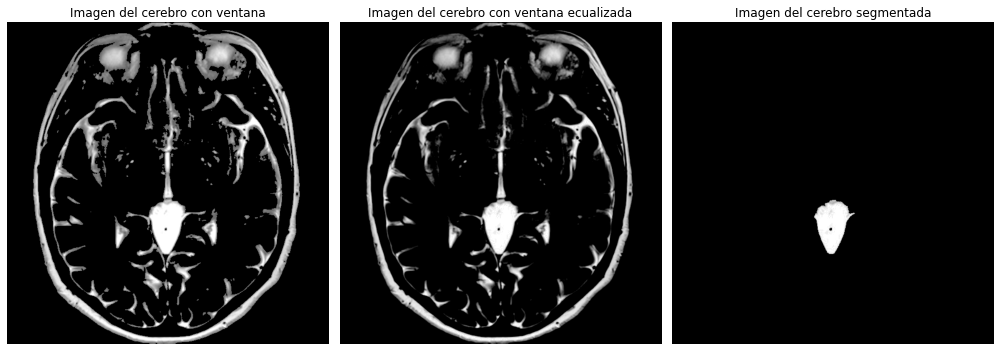

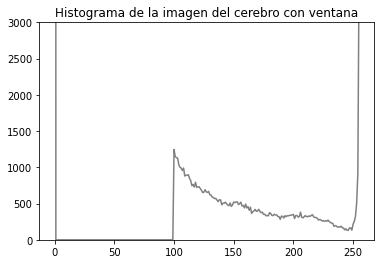

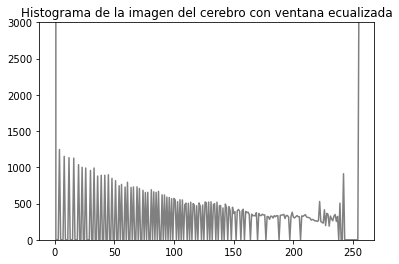

In [198]:
# Ahora vamos a probar a segmentar utilizando una ventana

w_cerebro = np.where(cerebro < 100, 0, cerebro)
w_cerebro = np.uint8(w_cerebro)

# Ecualizamos la imagen
cerebro_eq = cv.equalizeHist(w_cerebro)

#Ahora podemos segmentar la imagen

seg_cerebro_w = sk.segmentation.flood_fill(cerebro_eq, seed_point=(400,300), new_value =0, tolerance=100)
resta_cerebro = cerebro_eq - seg_cerebro_w

fig = plt.figure(figsize=(14, 12))

gs = GridSpec(1, 3)
ax0 = fig.add_subplot(gs[0,0])
ax3 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[0,2])

ax0.imshow(w_cerebro, cmap='gray')
ax0.set_title('Imagen del cerebro con ventana')
ax1.imshow(resta_cerebro, cmap='gray')
ax1.set_title('Imagen del cerebro segmentada')
ax3.imshow(cerebro_eq, cmap='gray')
ax3.set_title('Imagen del cerebro con ventana ecualizada')
for a in (ax0, ax1,ax3):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()

h1 = cv.calcHist([w_cerebro], [0], None, [256], [0, 256])
plt.plot(h1, color = "gray")
plt.title("Histograma de la imagen del cerebro con ventana")
plt.ylim(0,3000)
plt.show()

h2 = cv.calcHist([cerebro_eq], [0], None, [256], [0, 256])
plt.plot(h2, color = "gray")
plt.title("Histograma de la imagen del cerebro con ventana ecualizada")
plt.ylim(0,3000)
plt.show()



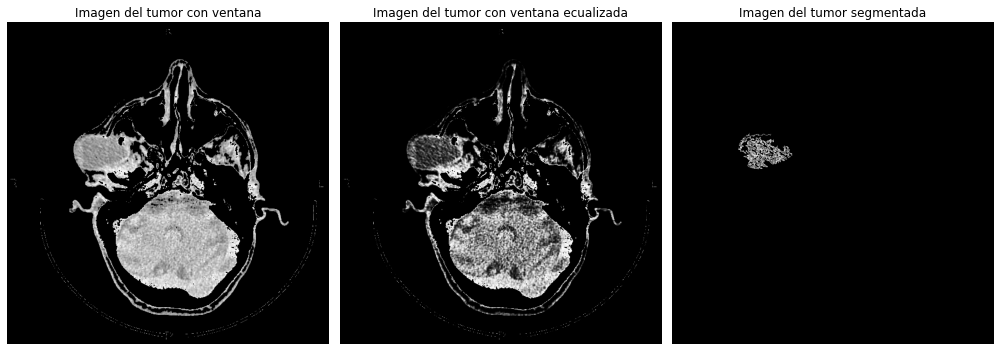

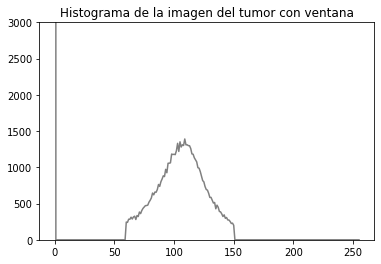

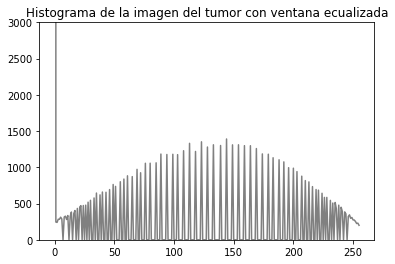

In [201]:
# Vamos a probar a segmentar la imagen del tumor con ventana

w_tumor = np.where(tumor < 60, 0, tumor)
w_tumor = np.where(tumor > 150, 0, w_tumor)
w_tumor = np.uint8(w_tumor)

# Ecualizamos la imagen
tumor_eq = cv.equalizeHist(w_tumor)

#Ahora podemos segmentar la imagen

seg_tumor_w = sk.segmentation.flood_fill(tumor_eq, seed_point=(250,200), new_value =255, tolerance=30)
resta_tumor = tumor_eq - seg_tumor_w

fig = plt.figure(figsize=(14, 12))

gs = GridSpec(1, 3)
ax0 = fig.add_subplot(gs[0,0])
ax3 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[0,2])

ax0.imshow(w_tumor, cmap='gray')
ax0.set_title('Imagen del tumor con ventana')
ax1.imshow(resta_tumor, cmap='gray')
ax1.set_title('Imagen del tumor segmentada')
ax3.imshow(tumor_eq, cmap='gray')
ax3.set_title('Imagen del tumor con ventana ecualizada')
for a in (ax0, ax1,ax3):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()

h = cv.calcHist([w_tumor], [0], None, [256], [0, 256])
plt.plot(h, color = "gray")
plt.title("Histograma de la imagen del tumor con ventana")
plt.ylim(0,3000)
plt.show()

h = cv.calcHist([tumor_eq], [0], None, [256], [0, 256])
plt.plot(h, color = "gray")
plt.title("Histograma de la imagen del tumor con ventana ecualizada")
plt.ylim(0,3000)
plt.show()

## Watershed

Imagen del cerebro suavizada


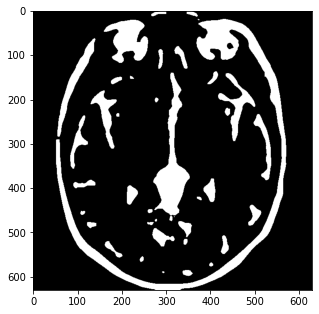

In [224]:
# Primero suavizamos la imagen que vamos a usar para disminuir ruido y bordes indeseados

cerebro_suavizado = cv.medianBlur(cerebro_binarizado, 15) # Suavizamos la imagen del cerebro con un filtro de mediana, usamos la imagen binarizada porque ya

# ya ha sufrido un proceso de eliminacion de ruido adicional
print("Imagen del cerebro suavizada")

fig = plt.figure(figsize=(5, 12))
plt.imshow(cerebro_suavizado, cmap='gray')
plt.show()

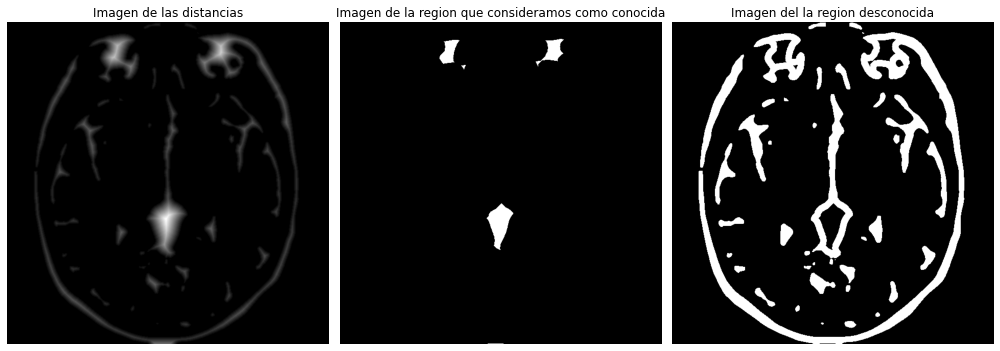

In [225]:
# Vamos a ver que region de la imagen estamos seguros de que es parte de la region que queremos segmentar,
# para ello vamos a calcular la distancia euclidea de los pixeles de objeto al pixel cero mas cercano, así sabremos que pixeles
# estan mas cerca del fondo (menos informacion) y cuales estan mas cerca del objeto (mas informacion)

distancia_transform = cv.distanceTransform(cerebro_suavizado, distanceType=cv.DIST_L2, maskSize=cv.DIST_MASK_5,)
# Con esta funcion calculamos la distancia euclidea, tenemos que pasarle una imagen binaria
no_fondo = cv.threshold(distancia_transform,0.4*distancia_transform.max(),255,cv.THRESH_BINARY)[1]

# cv2.THRESH_BINARY, hace que los valores de la imagen que esten por debajo del umbral se pongan a 0 y los que esten por encima se pongan a 255

# Ahora vamos a calcular la region que consideramos como desconocida (no estamos seguros de si es parte de la region que queremos segmentar o no)

no_fondo = np.uint8(no_fondo)
region_desconocida = cv.subtract(cerebro_suavizado,no_fondo) # La region desconocida será la imagen menos lo que estamos seguros que no es el fondo


fig = plt.figure(figsize=(14, 12))

gs = GridSpec(1, 3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

ax0.imshow(distancia_transform, cmap='gray')
ax0.set_title('Imagen de las distancias')
ax1.imshow(no_fondo, cmap='gray')
ax1.set_title('Imagen de la region que consideramos como conocida')
ax3.imshow(region_desconocida, cmap='gray')
ax3.set_title('Imagen del la region desconocida')
for a in (ax0, ax1,ax3):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()

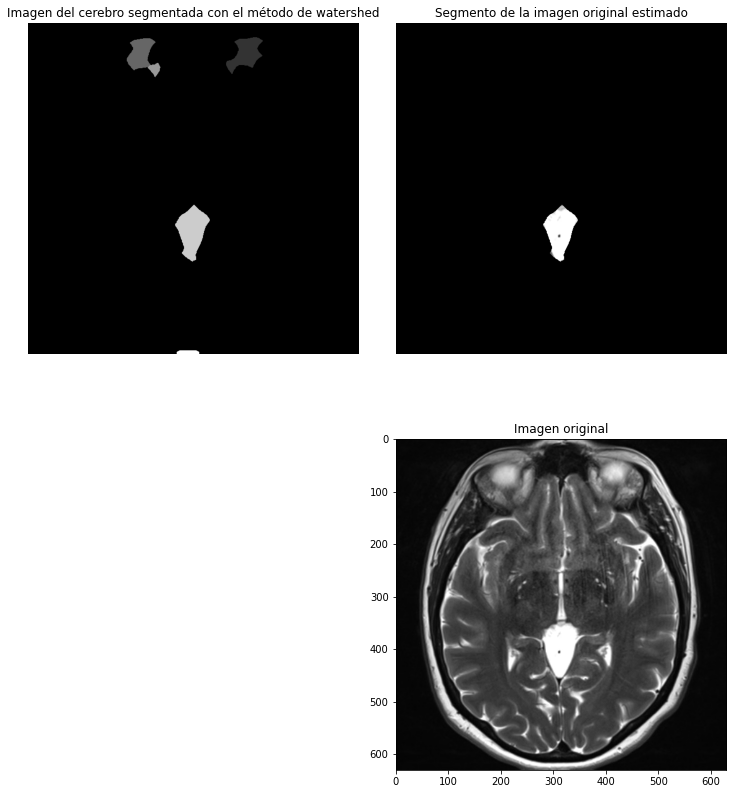

In [226]:
# Creamos los marcadores

marcadores_cerebro = cv.connectedComponents(no_fondo)[1]
# Marcamos el objeto con 1
marcadores_cerebro = marcadores_cerebro+1
# Marcamos las regiones deconocidas con 0
marcadores_cerebro[region_desconocida==255] = 0

watershed_cerebro = sk.segmentation.watershed(cerebro_suavizado, markers = marcadores_cerebro) # Segmentamos la imagen del cerebro con el método de watershed

# Separamos la region de interes

# Mediante el plot del resultado, podemos ver que regiones tienen cada valor, por lo que podemos aislar la region de interes
region_cerebro_watershed = np.where(watershed_cerebro != 5, 1, watershed_cerebro)
region_cerebro_watershed = np.uint8(region_cerebro_watershed)

# Visualizamos la region del cerebro estimada 
region_cerebro_watershed = np.where(region_cerebro_watershed == 1, cerebro, region_cerebro_watershed)
region_cerebro_watershed = np.uint8(region_cerebro_watershed)

segmento = cerebro - region_cerebro_watershed

fig = plt.figure(figsize=(10, 12))

gs = GridSpec(2, 2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])

ax0.imshow(watershed_cerebro, cmap='gray')
ax0.set_title('Imagen del cerebro segmentada con el método de watershed')
ax1.imshow(segmento, cmap='gray')
ax1.set_title('Segmento de la imagen original estimado')
ax3.imshow(cerebro, cmap='gray')
ax3.set_title('Imagen original')
for a in (ax0, ax1, ax3):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()

Imagen del cerebro con tumor suavizada


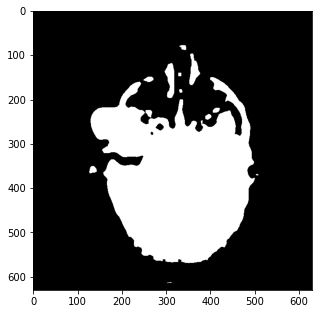

In [227]:
# Hacemos lo mismo para la imagen del tumor

# Primero suavizamos la imagen que vamos a usar para disminuir ruido y bordes indeseados
tumor_suavizado = cv.medianBlur(tumor_binarizado_manual, 15)

print("Imagen del cerebro con tumor suavizada")
fig = plt.figure(figsize=(5, 12))
plt.imshow(tumor_suavizado, cmap='gray')
plt.show()

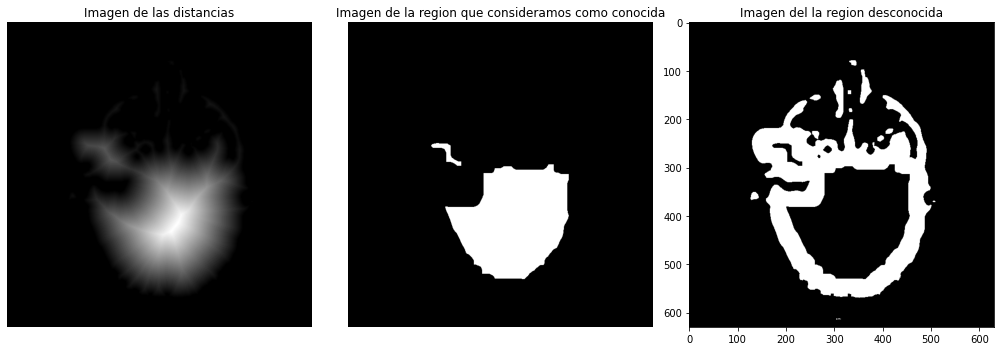

In [228]:
# Vamos a ver que region de la imagen estamos seguros de que es parte de la region que queremos segmentar

distancia_transform = cv.distanceTransform(tumor_suavizado, distanceType=cv.DIST_L2, maskSize=cv.DIST_MASK_5,)

no_fondo = cv.threshold(distancia_transform,0.05*distancia_transform.max(),255,cv.THRESH_BINARY)[1]

# En este caso, vamos a hacer un erosionado de la imagen que permita separar el tumor del resto de la masa del cerebro

no_fondo = cv.erode(no_fondo, np.ones((11,11),np.uint8), iterations = 5)

no_fondo = np.uint8(no_fondo)
region_desconocida = cv.subtract(tumor_suavizado,no_fondo)

fig = plt.figure(figsize=(14, 12))

gs = GridSpec(1, 3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

ax0.imshow(distancia_transform, cmap='gray')
ax0.set_title('Imagen de las distancias')
ax1.imshow(no_fondo, cmap='gray')
ax1.set_title('Imagen de la region que consideramos como conocida')
ax2.imshow(region_desconocida, cmap='gray')
ax2.set_title('Imagen del la region desconocida')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()

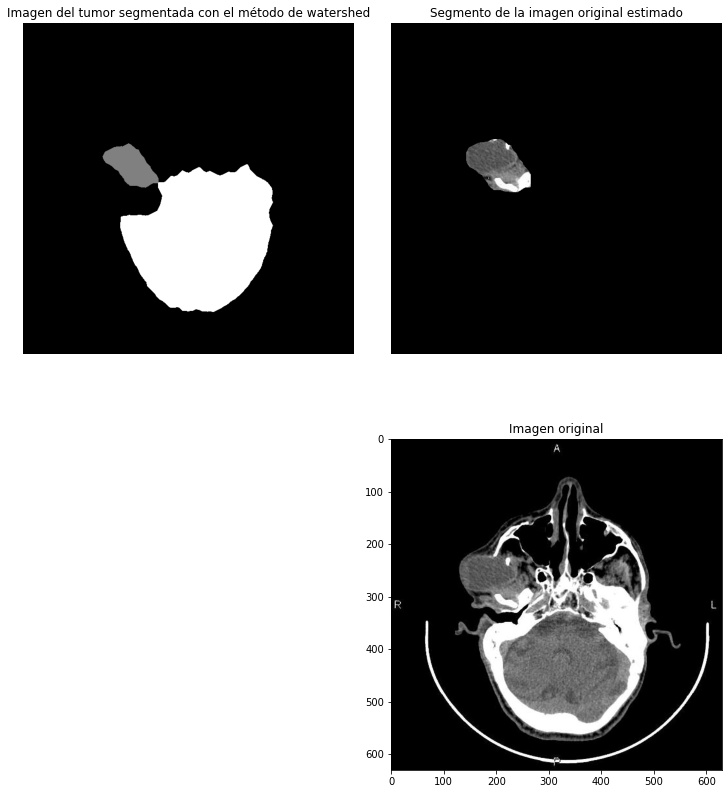

In [229]:
# Calculamos los marcadores

marcadores_tumor = cv.connectedComponents(no_fondo)[1]
# Marcamos el objeto con 1
marcadores_tumor = marcadores_tumor+1
# Marcamos las regiones deconocidas con 0
marcadores_tumor[region_desconocida==255] = 0

watershed_tumor = sk.segmentation.watershed(tumor_suavizado, markers = marcadores_tumor) # Segmentamos la imagen del cerebro con tumor con el método de watershed

# Primero separamos la region con el tumor (sabemos que le corresponde el valor de intensidad 2 gracias al color de la imagen)
# (solo hay tres regiones, 1->fondo, 2->tumor, 3->resto del cerebro)

region_tumor_watershed = np.where(watershed_tumor != 2, 1, watershed_tumor)
region_tumor_watershed = np.uint8(region_tumor_watershed)

# Una vez tenemos la region aislada, realizamos la dilatación para recuperar la region perdida en la erosion y tener un mejor ajuste

region_tumor_watershed = cv.dilate(region_tumor_watershed, np.ones((9,9),np.uint8), iterations = 2)

# Visualizamos la region del tumor estimada
region_tumor_watershed = np.where(region_tumor_watershed == 1, tumor, region_tumor_watershed)
region_tumor_watershed = np.uint8(region_tumor_watershed)
segmento = tumor - region_tumor_watershed

fig = plt.figure(figsize=(10, 12))

gs = GridSpec(2, 2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])

ax0.imshow(watershed_tumor, cmap='gray')
ax0.set_title('Imagen del tumor segmentada con el método de watershed')
ax1.imshow(segmento, cmap='gray')
ax1.set_title('Segmento de la imagen original estimado')
ax2.imshow(tumor, cmap='gray')
ax2.set_title('Imagen original')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()

### Active Contour

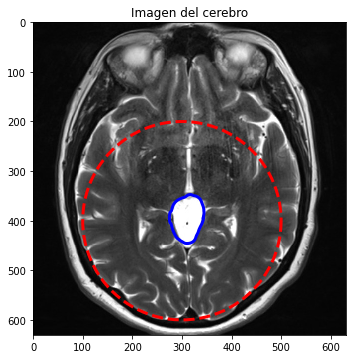

(0.0, 630.0, 630.0, 0.0)

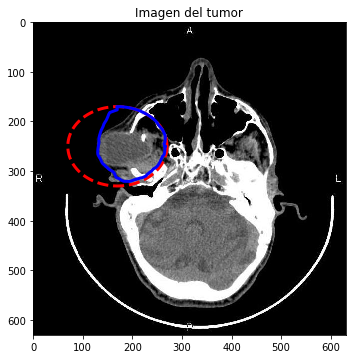

In [218]:
# Creamos la region que queremos segmentar
s = np.linspace(0, 2 * np.pi, 100) # Cuantos mas pasos, mas grande es el area a segmentar
r = 400 + 200 * np.sin(s) #primero componente -> coordenada y, segundo componente -> longitud sen (crecimiento eje y)
c = 300 + 200 * np.cos(s) #primero componente -> coordenada x, segundo componente -> longitud cos (crecimiento eje x)
init = np.array([r, c]).T

snake_cerebro = sk.segmentation.active_contour(cerebro, init, alpha = 0.015, beta = 10, gamma = 0.001)
# alpha - mayor alpha, mayor velocidad de contraccion // beta - mayor beta, mayor suavizado de la serpiente // gamma - mayor gamma, mayor ajuste de la serpiente

# Mostramos la imagen del cerebro 
fig = plt.figure(figsize=(5, 12))
sk.io.imshow(cerebro)
plt.plot(init[:, 1], init[:, 0], '--r', lw=3)
plt.title("Imagen del cerebro")
plt.plot(snake_cerebro[:, 1], snake_cerebro[:, 0], '-b', lw=3)
plt.axis([0, cerebro.shape[1], cerebro.shape[0], 0])
plt.show()

# La serpiente se ajusta perfectamente a la zona a segmentar, ya que esta tiene un gradiente muy alto en comparacion al resto de tejidos
# de la zona proxima

# Creamos la region que queremos segmentar
s = np.linspace(0, 2 * np.pi, 100) 
r = 250 + 80 * np.sin(s) # Utilizamos distintos valores en el segundo componente porque en este caso el tumor no es circular 
c = 170 + 100 * np.cos(s)
init = np.array([r, c]).T

snake_tumor = sk.segmentation.active_contour(tumor, init, alpha=0.015, beta=10, gamma=0.001, w_line=1, w_edge = 5, max_num_iter=2500)

# Mostramos la imagen del tumor
fig = plt.figure(figsize=(5, 12))
sk.io.imshow(tumor)
plt.plot(init[:, 1], init[:, 0], '--r', lw=3)
plt.title("Imagen del tumor")
plt.plot(snake_tumor[:, 1], snake_tumor[:, 0], '-b', lw=3)
plt.axis([0, cerebro.shape[1], cerebro.shape[0], 0])

# En este caso, la serpiente no se ajusta correctamente al tumor, ya que cerca de el se encuentra el hueso, una region con un gradiente
# de mucha intensidad que hace que la serpiente se vea más atraida al hueso, desplazando el borde del segmento hacia el

## Otros metodos de segmentacion

### Random Walker

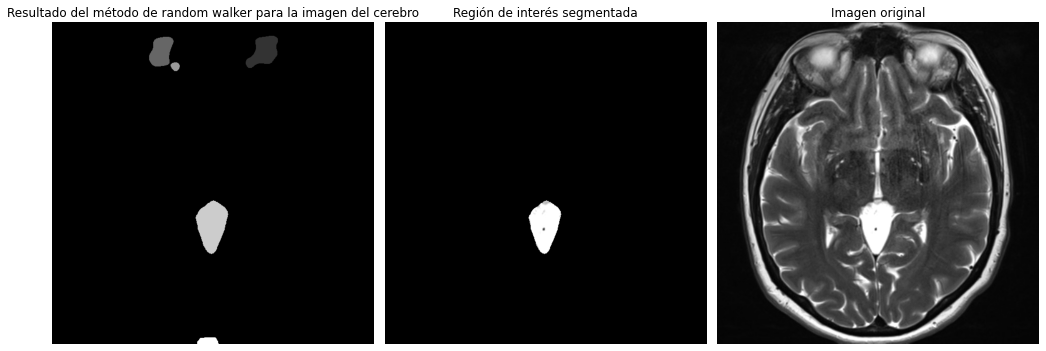

In [231]:
# Para este método, utilizaremos los marcadores que hemos obtenido en el método de watershed, por lo que solamente tendremos que ejecutar la función

labels = sk.segmentation.random_walker(cerebro, marcadores_cerebro, beta=100, mode='bf')

region_cerebro_rw = np.where(labels != 5, 1, labels)
region_cerebro_rw = np.where(region_cerebro_rw == 1, cerebro, region_cerebro_rw)
region_cerebro_rw = np.uint8(region_cerebro_rw)
segmento = cerebro - region_cerebro_rw

fig = plt.figure(figsize=(14, 12))

gs = GridSpec(1, 3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

ax0.imshow(labels, cmap='gray')
ax0.set_title('Resultado del método de random walker para la imagen del cerebro')
ax1.imshow(segmento, cmap='gray')
ax1.set_title('Región de interés segmentada')
ax2.imshow(cerebro, cmap='gray')
ax2.set_title('Imagen original')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()

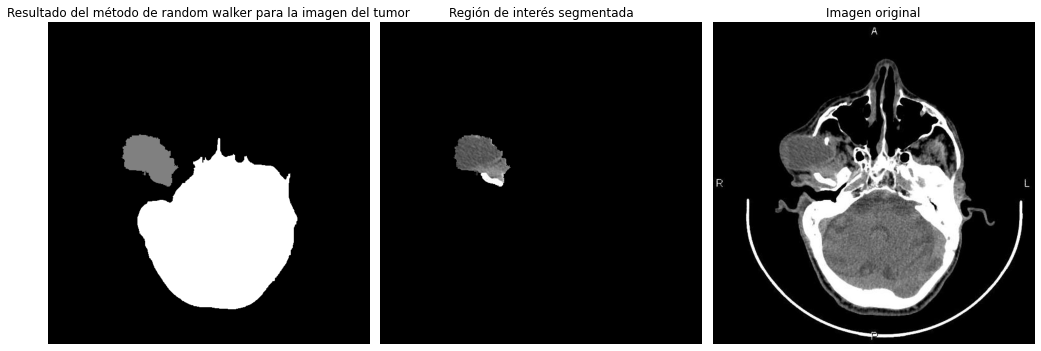

In [233]:
# Realizamos la segmentación para la imagen del tumor

labels = sk.segmentation.random_walker(tumor, marcadores_tumor, beta=10000, mode='bf')
# En este caso, aumentamos el valor de beta para que el algoritmo tenga mas en cuenta los marcadores que le hemos pasado

region_tumor_rw = np.where(labels != 2, 1, labels)
region_tumor_rw = np.where(region_tumor_rw == 1, tumor, region_tumor_rw)
region_tumor_rw = np.uint8(region_tumor_rw)
segmento = tumor - region_tumor_rw

fig = plt.figure(figsize=(14, 12))

gs = GridSpec(1, 3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

ax0.imshow(labels, cmap='gray')
ax0.set_title('Resultado del método de random walker para la imagen del tumor')
ax1.imshow(segmento, cmap='gray')
ax1.set_title('Región de interés segmentada')
ax2.imshow(tumor, cmap='gray')
ax2.set_title('Imagen original')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()
plt.show()